<a href="https://colab.research.google.com/github/treetops81/HR-Research-Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Inspiration**

I'll be using a Human Resources dataset from Kaggle to investigate the below questions using various different methods. Further information for the dataset can be found here: https://rpubs.com/rhuebner/hrd_cb_v14

1. Is there any relationship between who a person works for and their performance score?
2. What is the overall diversity profile of the organization?
3. What are our best recruiting sources if we want to ensure a diverse organization?
4. Can we predict who is going to terminate and who isn't? 
5. Are there areas of the company where pay is not equitable?

***Before we start we'll need to do some exploratory data analysis***

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# useful
from collections import Counter

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/treetops81/HR-Research-Project/main/HRDataset_v14.csv')

In [ ]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
df.shape

(311, 36)

In [ ]:
df.isna().sum()

# df_term = df[df['Termd'] == 1]
# df_no_term = df[df['Termd'] == 0]
# df_term.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

We can see that only the date of termination and ManagerID columns have missing values (for those that haven't been terminated). However you can see below that due to a lot of variables being 'Object' we may have missing values in data that aren't being picked up by the isna fuction.

In [ ]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [ ]:
df[df['ManagerID'].isna()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,0,19,Production Technician I,MA,2452,04/06/79,M,Single,US Citizen,No,Asian,7/8/2013,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,0,20,Production Technician II,MA,1013,07/28/83,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,0,19,Production Technician I,MA,1845,08/24/83,M,Single,US Citizen,No,White,7/8/2013,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,0,20,Production Technician II,MA,2324,09/27/87,F,Single,US Citizen,No,Black or African American,2/17/2014,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,1/7/2019,0,7
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,0,20,Production Technician II,MA,2351,05/07/92,F,Separated,US Citizen,No,White,6/5/2015,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2/14/2019,0,6
177,"Manchester, Robyn",10077,1,1,0,2,5,3,0,62385,0,20,Production Technician II,MA,2324,08/25/76,F,Married,US Citizen,No,White,5/11/2016,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,5.00,3,0,1/21/2019,0,4
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,0,19,Production Technician I,MA,2171,01/12/73,F,Married,US Citizen,No,Asian,11/28/2011,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,2/11/2019,0,16
251,"Sewkumar, Nori",10071,0,0,0,3,5,3,0,50923,0,19,Production Technician I,MA,2191,03/10/75,F,Single,US Citizen,No,Asian,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,5.00,5,0,2/6/2019,0,14


All of our missing Manager IDs relate to Webster Butler. Lets check if he already has a manager ID before we create a new one.

In [ ]:
df[df['ManagerName'] == 'Webster Butler'].head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,0,19,Production Technician I,MA,2452,04/06/79,M,Single,US Citizen,No,Asian,7/8/2013,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,0,20,Production Technician II,MA,1013,07/28/83,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,0,19,Production Technician I,MA,1845,08/24/83,M,Single,US Citizen,No,White,7/8/2013,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4
65,"DeGweck, James",10070,1,1,1,5,5,3,0,55722,1,19,Production Technician I,MA,1810,10/31/77,M,Married,US Citizen,No,White,5/16/2011,6/8/2016,unhappy,Voluntarily Terminated,Production,Webster Butler,39.0,Indeed,Fully Meets,5.00,4,0,4/2/2016,0,14


So his manager ID is 39 - let us assign this value to our missing cases and convert the column to integer for easier reading in the future.

In [ ]:
df.ManagerID.fillna(39.0, inplace=True)
df['ManagerID'] = df['ManagerID'].astype('int64')

In [ ]:
# This looks reasonable for satisfaction amoung staff
df.EmpSatisfaction.value_counts()

3    108
5     98
4     94
2      9
1      2
Name: EmpSatisfaction, dtype: int64

In [ ]:
# Min value looks reasonable, but more investigation is needed for the maximum values
df.Salary.describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


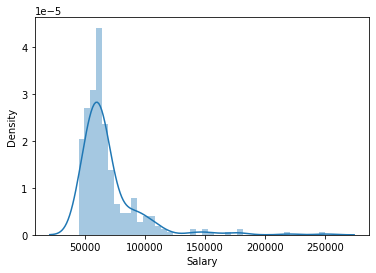

In [ ]:
# This plot shows that the volume of high salary individuals above 125k is very low
sns.distplot(a = df.Salary)

In [ ]:
# These salaries look correct, all of these positions would be expected to have higher salaries than others. We also check there are no other managers in our dataset.
df[df['Salary'] > 125000].head()
# df[df['Salary'] > 125000]
# df[df['Position'].str.contains('IT Manager')]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,0,10,Director of Operations,MA,2030,03/19/83,M,Single,US Citizen,No,Black or African American,1/5/2009,NaN,N/A-StillEmployed,Active,Production,Janet King,2,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15
76,"Dougall, Eric",10028,0,0,1,1,3,4,0,138888,0,13,IT Manager - Support,MA,1886,07/09/70,M,Single,US Citizen,No,Black or African American,1/5/2014,NaN,N/A-StillEmployed,Active,IT/IS,Jennifer Zamora,5,Indeed,Exceeds,4.30,5,5,1/4/2019,0,4
96,"Foss, Jason",10015,0,0,1,1,3,4,0,178000,0,12,IT Director,MA,1460,07/05/80,M,Single,US Citizen,No,Black or African American,4/15/2011,NaN,N/A-StillEmployed,Active,IT/IS,Jennifer Zamora,5,Indeed,Exceeds,5.00,5,5,1/7/2019,0,15
131,"Houlihan, Debra",10272,1,1,0,1,6,3,0,180000,0,11,Director of Sales,RI,2908,03/17/66,F,Married,US Citizen,No,White,5/5/2014,NaN,N/A-StillEmployed,Active,Sales,Janet King,2,LinkedIn,Fully Meets,4.50,4,0,1/21/2019,0,19
150,"King, Janet",10089,1,1,0,1,2,3,0,250000,0,16,President & CEO,MA,1902,09/21/54,F,Married,US Citizen,Yes,White,7/2/2012,NaN,N/A-StillEmployed,Active,Executive Office,Board of Directors,9,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10


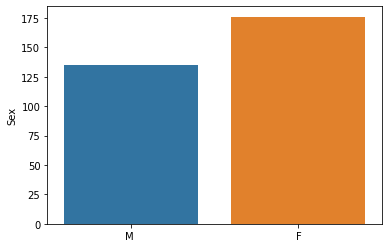

In [ ]:
sns.barplot(x=df.Sex.unique(), y=df.Sex.value_counts()[df.Sex.unique()])

In [ ]:
# Looks like the company is based in Massachusetts. I will assume that anyone else is working remotely and assign a new table to this.
df.State.value_counts()
df['Remote'] = np.where(df['State'] == 'MA', 0, 1)

Lets correct the date variables to be dates rather than objects

In [ ]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DOB'] = pd.to_datetime(df['DOB'])

In [ ]:
print('Max termination date:', df.DateofTermination.max())
print('Min termination date:', df.DateofTermination.min())
print('Max hire date:', df.DateofHire.max())
print('Min hire date:', df.DateofHire.min())
print('Max DOB:', df.DOB.max())
print('Min DOB:', df.DOB.min())

Max termination date: 2018-11-10 00:00:00
Min termination date: 2010-08-30 00:00:00
Max hire date: 2018-07-09 00:00:00
Min hire date: 2006-01-09 00:00:00
Max DOB: 2070-12-22 00:00:00
Min DOB: 1971-07-10 00:00:00


In [ ]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Remote
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,0


In [ ]:
df.HispanicLatino.value_counts()
def HLBinary(record_value):
  if record_value in ['No','no']:
    return 0
  else:
    return 1

df['HispanicLatino'] = df['HispanicLatino'].apply(lambda x: HLBinary(x))

When we look at each of the questions we may need to investigate further, but as a simmple check we can see that our Status ID's match our Descriptions (at least for the Marital field)

In [ ]:
print(df.MaritalDesc.value_counts())
print(df.MaritalStatusID.value_counts())

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64
0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64


In [ ]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Remote
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,0,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,0,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,0,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,0,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,0,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,0


Save the updated dataset to be used in the next notebooks

In [ ]:
df.to_csv('HRDataset_v14_Edited.csv')
from google.colab import files
files.download("HRDataset_v14_Edited.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>